In [247]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


diamonds = sns.load_dataset("diamonds")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [248]:
diamonds.shape

(53940, 10)

In [249]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [250]:
diamonds.describe(exclude=np.number)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [251]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [252]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [253]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [254]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [255]:
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [256]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [257]:
X_test.shape

(13485, 9)

In [258]:
X_prediction=X_test.head(100)
y_prediction =y_test.head(100)


In [259]:
y_prediction=np.array(y_prediction)

In [260]:
type(y_prediction)

numpy.ndarray

In [261]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Cross-Validation


In [262]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)



In [263]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2874.530912,9.576510,2877.437274,37.093540
1,2089.327469,8.317290,2094.021636,24.828795
2,1550.617973,5.223297,1558.386252,18.540267
3,1183.812759,5.193420,1195.032441,13.471580
4,941.203113,4.539805,958.728828,9.479449


In [264]:
best_rmse = results['test-rmse-mean'].min()

best_rmse


549.311480649509

# Train way

In [265]:

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 1000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50, # Every ten rounds
   early_stopping_rounds=20

)


[0]	validation-rmse:2817.38773	train-rmse:2874.29379


[50]	validation-rmse:553.50718	train-rmse:430.07110
[100]	validation-rmse:555.39120	train-rmse:372.49371
[150]	validation-rmse:557.80361	train-rmse:333.62595
[200]	validation-rmse:559.48104	train-rmse:300.06795
[250]	validation-rmse:561.30944	train-rmse:276.85755
[300]	validation-rmse:561.43599	train-rmse:257.34345
[350]	validation-rmse:561.82074	train-rmse:239.54154
[400]	validation-rmse:563.09188	train-rmse:223.46175
[450]	validation-rmse:563.07923	train-rmse:209.80627
[500]	validation-rmse:563.29248	train-rmse:197.72375
[550]	validation-rmse:565.24722	train-rmse:187.28444
[600]	validation-rmse:566.42436	train-rmse:176.54386
[650]	validation-rmse:567.17392	train-rmse:166.61162
[700]	validation-rmse:568.01290	train-rmse:157.61657
[750]	validation-rmse:568.62872	train-rmse:150.03843
[800]	validation-rmse:569.21259	train-rmse:143.23111
[850]	validation-rmse:569.80695	train-rmse:137.52825
[900]	validation-rmse:570.23810	train-rmse:132.00300
[950]	validation-rmse:571.27079	train-rmse:126.

In [266]:
import xgboost as xgb
import matplotlib.pyplot as plt

prediction=xgb.DMatrix(X_prediction,y_prediction,  enable_categorical=True)



In [267]:
pre_res=model.predict(prediction)

In [268]:
pre_res.shape

(100,)

In [269]:
y_prediction=np.array(y_prediction)

y_prediction=y_prediction.reshape(len(y_prediction),)
y_prediction.shape

(100,)

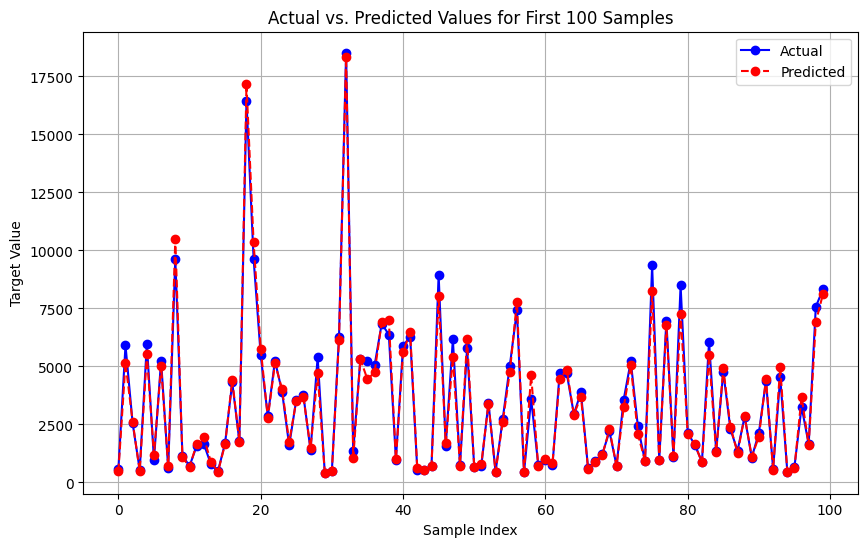

In [270]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the XGBoost model and have `model` defined


# Create a list of sample indices (0 to 9) for labeling
sample_indices = list(range(len(y_prediction)))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_prediction, marker='o', linestyle='-', label='Actual', color='b')
plt.plot(sample_indices, pre_res, marker='o', linestyle='--', label='Predicted', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values for First 100 Samples')
plt.legend()
plt.grid(True)
plt.show()
